In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from layer import layer
from network import neural_network
from sklearn.model_selection import train_test_split
from Optimizers import Optimizers
import loss_funcs as losses


In [2]:
# load the data
def load_data():
    with open('data/heart.csv') as file:
        reader = csv.reader(file)
        headers = next(reader)
        data = np.array(list(reader) , dtype= np.float64)
# seperate input and labels
# last column is the labels
    Y = data[:,-1]
    # remove labels from data
    X = data[:,:-1]
    # normalize the data
    # i will be dividing each value with the max value in the column
    X = X / X.max(axis=0)
    return headers,X,Y


In [3]:
# split data into train and test 
headers, X , Y = load_data()
x_train , x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

# reshape lables arrays
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [4]:
# define M and N for training samples
M = x_train.shape[0]
N = x_train.shape[1]

In [5]:
# create a model
model = neural_network()

# compile model
model.compile(
    optimizer=Optimizers.BatchGradientDescent,
    Cost=losses.BinaryCrossEntropy()
)

# create the layers of the model
model.sequential(
    [
        layer(N,20,"relu"),
        layer(20,1,"sigmoid")
    ]
)

In [6]:
# train the model
model, costs = model.fit(x_train,y_train,0.012,300000)

epoch 0 cost: 0.7237323493407084
epoch 30000 cost: 0.3520320394802167
epoch 60000 cost: 0.34452224724489655
epoch 90000 cost: 0.30939598531337864
epoch 120000 cost: 0.30497040193141234
epoch 150000 cost: 0.3078169637467495
epoch 180000 cost: 0.31580173454009236
epoch 210000 cost: 0.32310987947045483
epoch 240000 cost: 0.30311784103977524
epoch 270000 cost: 0.2952849813822433


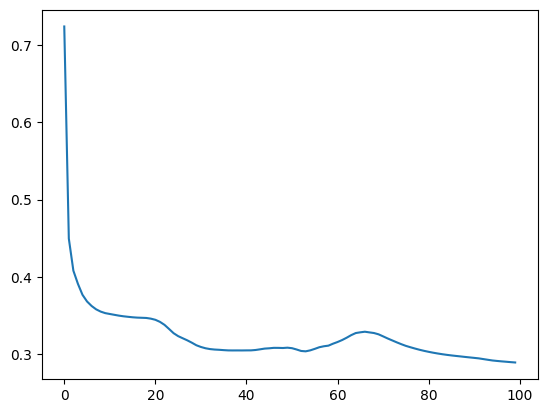

In [7]:
plt.plot(costs)

In [8]:
accuracy = ((x_test.shape[0] - np.sum((model.predict(x_test) != y_test).astype(int))) / x_test.shape[0] ) * 100

In [9]:
accuracy

80.32786885245902